In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

#### Defining a Y for a given dyad

In [15]:
handle = pd.read_csv(
    "./data/asylum_monthly_clean.csv", index_col=0, header=[0, 1], parse_dates=True
)
# This results in parsing to beginning of month, which is convenient for datetime processing
# although the values are technically the end of month reports

In [16]:
Y = handle["VE"]["DE"]
Y

date
2008-01-01      0
2008-02-01      0
2008-03-01      0
2008-04-01      0
2008-05-01      0
             ... 
2022-11-01    180
2022-12-01    235
2023-01-01    455
2023-02-01    305
2023-03-01    395
Name: DE, Length: 183, dtype: int64

#### Creating the template of the X data (only for 1 given dyad)
#### VE->DE in this example

In [17]:
start_date = "2014-01-01"
end_date = "2023-01-01"  # pd.to_datetime('today')  # Get the current month and year
monthly_index = pd.date_range(
    start=start_date, end=end_date, freq=pd.offsets.MonthBegin()
)

In [18]:
monthly_index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', length=109, freq='MS')

In [19]:
columns_template = ["recognition_rate"]
X_VE_DE = pd.DataFrame(index=monthly_index, columns=columns_template)
X_VE_DE

,recognition_rate
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,NaN
2014-05-01,NaN
...,...
2022-09-01,NaN
2022-10-01,NaN
2022-11-01,NaN
2022-12-01,NaN


In [20]:
recognition_rate = pd.read_csv(
    "./data/recognition_rates_interpolated.csv",
    index_col=0,
    header=[0, 1],
    parse_dates=True,
)

In [21]:
# As the index of both objects are the same datetime type, it takes only the values for the given months
X_VE_DE["recognition_rate"] = recognition_rate["VE"]["DE"]
X_VE_DE

,recognition_rate
2014-01-01,0.000000
2014-02-01,0.000000
2014-03-01,0.000000
2014-04-01,0.000000
2014-05-01,0.000000
...,...
2022-09-01,31.383333
2022-10-01,35.710000
2022-11-01,32.736667
2022-12-01,29.763333


In [22]:
gsearch = pd.read_csv(
    "./data/googletrends/VEDEkeywords.csv", skiprows=range(1), index_col=0
)
gsearch.index = pd.to_datetime(gsearch.index, format="%Y-%m")
gsearch.columns = gsearch.columns.str[:-13].str.replace(" ", "_")
gsearch

,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania
Mes,,,,
2014-06-01,0,0,30,0
2014-07-01,54,73,0,0
2014-08-01,48,0,0,0
2014-09-01,0,44,0,0
2014-10-01,21,0,33,0
...,...,...,...,...
2023-01-01,39,0,52,28
2023-02-01,0,70,0,0
2023-03-01,0,0,43,38


In [23]:
X_VE_DE = pd.concat([X_VE_DE["2014-06-01":], gsearch[:"2023-01-01"]], axis=1)
X_VE_DE

,recognition_rate,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania
2014-06-01,0.000000,0,0,30,0
2014-07-01,0.000000,54,73,0,0
2014-08-01,0.000000,48,0,0,0
2014-09-01,0.000000,0,44,0,0
2014-10-01,0.000000,21,0,33,0
...,...,...,...,...,...
2022-09-01,31.383333,0,0,39,0
2022-10-01,35.710000,0,25,36,44
2022-11-01,32.736667,0,0,0,0
2022-12-01,29.763333,0,0,0,0


In [24]:
X_VE_DE = pd.concat([X_VE_DE, Y], axis=1)
X_VE_DE

,recognition_rate,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania,DE
2008-01-01,NaN,NaN,NaN,NaN,NaN,0
2008-02-01,NaN,NaN,NaN,NaN,NaN,0
2008-03-01,NaN,NaN,NaN,NaN,NaN,0
2008-04-01,NaN,NaN,NaN,NaN,NaN,0
2008-05-01,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2022-11-01,32.736667,0.0,0.0,0.0,0.0,180
2022-12-01,29.763333,0.0,0.0,0.0,0.0,235
2023-01-01,26.790000,39.0,0.0,52.0,28.0,455
2023-02-01,NaN,NaN,NaN,NaN,NaN,305


In [28]:
X_VE_DE = X_VE_DE.rename(columns={"DE": "asyl_app"})
# X_VE_DE['lagged_asyl'] = X_VE_DE['asyl_app'].shift()

In [40]:
for lag in range(13, 25):
    X_VE_DE[f"{lag}lag_asyl"] = X_VE_DE["asyl_app"].shift(lag)
X_VE_DE

,recognition_rate,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania,asyl_app,0lag_asyl,1lag_asyl,2lag_asyl,3lag_asyl,...,15lag_asyl,16lag_asyl,17lag_asyl,18lag_asyl,19lag_asyl,20lag_asyl,21lag_asyl,22lag_asyl,23lag_asyl,24lag_asyl
2008-01-01,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,32.736667,0.0,0.0,0.0,0.0,180,180,85.0,125.0,130.0,...,25.0,10.0,15.0,20.0,10.0,25.0,10.0,15.0,20.0,10.0
2022-12-01,29.763333,0.0,0.0,0.0,0.0,235,235,180.0,85.0,125.0,...,70.0,25.0,10.0,15.0,20.0,10.0,25.0,10.0,15.0,20.0
2023-01-01,26.790000,39.0,0.0,52.0,28.0,455,455,235.0,180.0,85.0,...,55.0,70.0,25.0,10.0,15.0,20.0,10.0,25.0,10.0,15.0
2023-02-01,NaN,NaN,NaN,NaN,NaN,305,305,455.0,235.0,180.0,...,65.0,55.0,70.0,25.0,10.0,15.0,20.0,10.0,25.0,10.0


In [46]:
X_VE_DE.dropna()

,recognition_rate,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania,asyl_app,0lag_asyl,1lag_asyl,2lag_asyl,3lag_asyl,...,15lag_asyl,16lag_asyl,17lag_asyl,18lag_asyl,19lag_asyl,20lag_asyl,21lag_asyl,22lag_asyl,23lag_asyl,24lag_asyl
2014-06-01,0.000000,0.0,0.0,30.0,0.0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-07-01,0.000000,54.0,73.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-08-01,0.000000,48.0,0.0,0.0,0.0,5,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-09-01,0.000000,0.0,44.0,0.0,0.0,0,0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-01,0.000000,21.0,0.0,33.0,0.0,0,0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,31.383333,0.0,0.0,39.0,0.0,125,125,130.0,150.0,100.0,...,15.0,20.0,10.0,25.0,10.0,15.0,20.0,10.0,5.0,10.0
2022-10-01,35.710000,0.0,25.0,36.0,44.0,85,85,125.0,130.0,150.0,...,10.0,15.0,20.0,10.0,25.0,10.0,15.0,20.0,10.0,5.0
2022-11-01,32.736667,0.0,0.0,0.0,0.0,180,180,85.0,125.0,130.0,...,25.0,10.0,15.0,20.0,10.0,25.0,10.0,15.0,20.0,10.0
2022-12-01,29.763333,0.0,0.0,0.0,0.0,235,235,180.0,85.0,125.0,...,70.0,25.0,10.0,15.0,20.0,10.0,25.0,10.0,15.0,20.0


<AxesSubplot:>

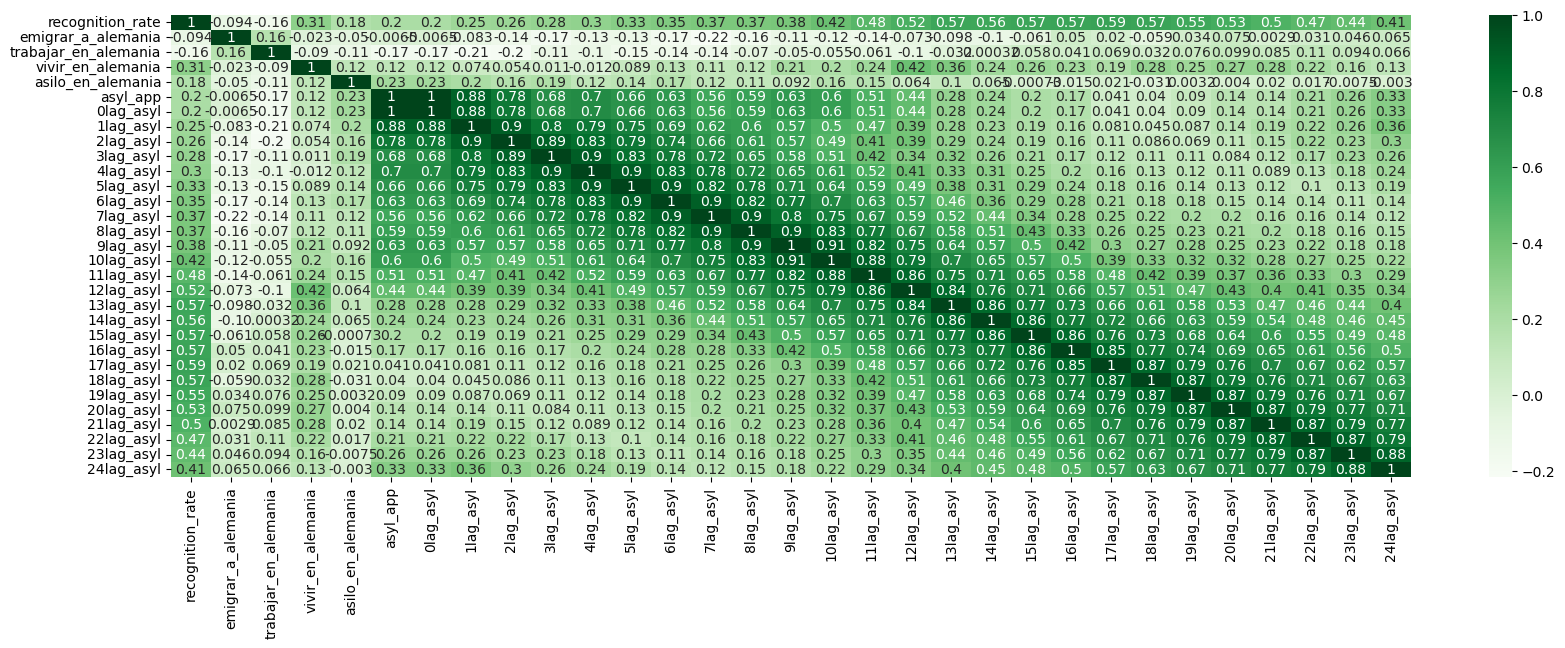

In [42]:
pearsoncorr = X_VE_DE.dropna().corr(method="pearson")
plt.figure(figsize=(20, 6))
sns.heatmap(
    pearsoncorr,
    xticklabels=pearsoncorr.columns,
    yticklabels=pearsoncorr.columns,
    cmap="Greens",
    annot=True,
)

Here we can find correlations between the google search 'vivir en alemania' and the 12 month ahead laged asylum applications. This suggests that google searches done today have an impact in the asylum applications to be expected in one year, at least for this specific case.

In [48]:
X_VE_DE.columns

Index(['recognition_rate', 'emigrar_a_alemania', 'trabajar_en_alemania',
       'vivir_en_alemania', 'asilo_en_alemania', 'asyl_app', '0lag_asyl',
       '1lag_asyl', '2lag_asyl', '3lag_asyl', '4lag_asyl', '5lag_asyl',
       '6lag_asyl', '7lag_asyl', '8lag_asyl', '9lag_asyl', '10lag_asyl',
       '11lag_asyl', '12lag_asyl', '13lag_asyl', '14lag_asyl', '15lag_asyl',
       '16lag_asyl', '17lag_asyl', '18lag_asyl', '19lag_asyl', '20lag_asyl',
       '21lag_asyl', '22lag_asyl', '23lag_asyl', '24lag_asyl'],
      dtype='object')

In [49]:
clock_aligned = X_VE_DE[
    [
        "emigrar_a_alemania",
        "trabajar_en_alemania",
        "vivir_en_alemania",
        "asilo_en_alemania",
        "12lag_asyl",
        "recognition_rate",
    ]
]

<AxesSubplot:>

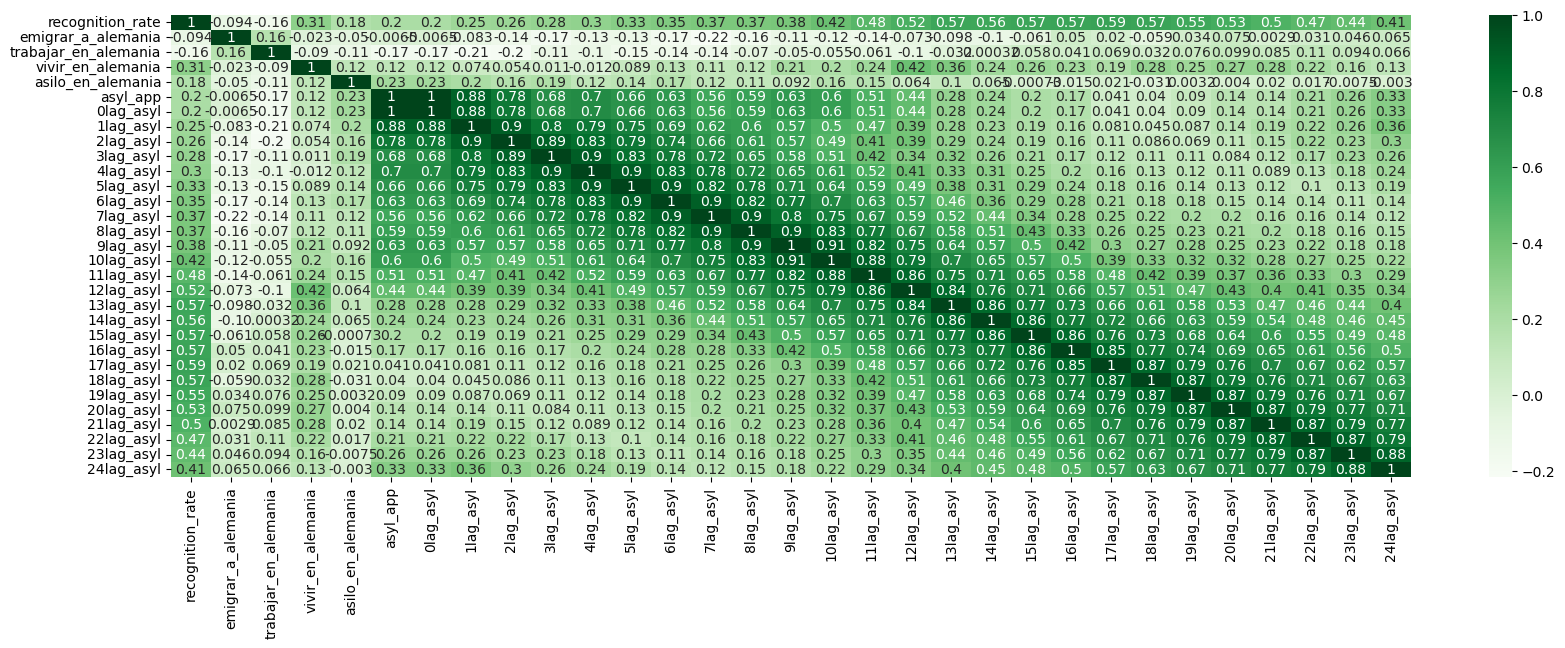

In [54]:
pearsoncorr = X_VE_DE.dropna().corr(method="pearson")
plt.figure(figsize=(20, 6))
sns.heatmap(
    pearsoncorr,
    xticklabels=pearsoncorr.columns,
    yticklabels=pearsoncorr.columns,
    cmap="Greens",
    annot=True,
)

In [56]:
for lag in range(-5, 6):
    clock_aligned[f"{lag}lag_rr"] = clock_aligned["recognition_rate"].shift(lag)
clock_aligned

/tmp/ipykernel_30999/1057255904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clock_aligned[f'{lag}lag_rr'] = clock_aligned['recognition_rate'].shift(lag)
/tmp/ipykernel_30999/1057255904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clock_aligned[f'{lag}lag_rr'] = clock_aligned['recognition_rate'].shift(lag)
/tmp/ipykernel_30999/1057255904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,emigrar_a_alemania,trabajar_en_alemania,vivir_en_alemania,asilo_en_alemania,12lag_asyl,recognition_rate,-5lag_rr,-4lag_rr,-3lag_rr,-2lag_rr,-1lag_rr,0lag_rr,1lag_rr,2lag_rr,3lag_rr,4lag_rr,5lag_rr
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,0.0,0.0,0.0,0.0,65.0,32.736667,NaN,NaN,NaN,26.79,29.763333,32.736667,35.710000,31.383333,27.056667,22.730000,24.320000
2022-12-01,0.0,0.0,0.0,0.0,70.0,29.763333,NaN,NaN,NaN,NaN,26.790000,29.763333,32.736667,35.710000,31.383333,27.056667,22.730000
2023-01-01,39.0,0.0,52.0,28.0,145.0,26.790000,NaN,NaN,NaN,NaN,NaN,26.790000,29.763333,32.736667,35.710000,31.383333,27.056667
2023-02-01,NaN,NaN,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.790000,29.763333,32.736667,35.710000,31.383333


<AxesSubplot:>

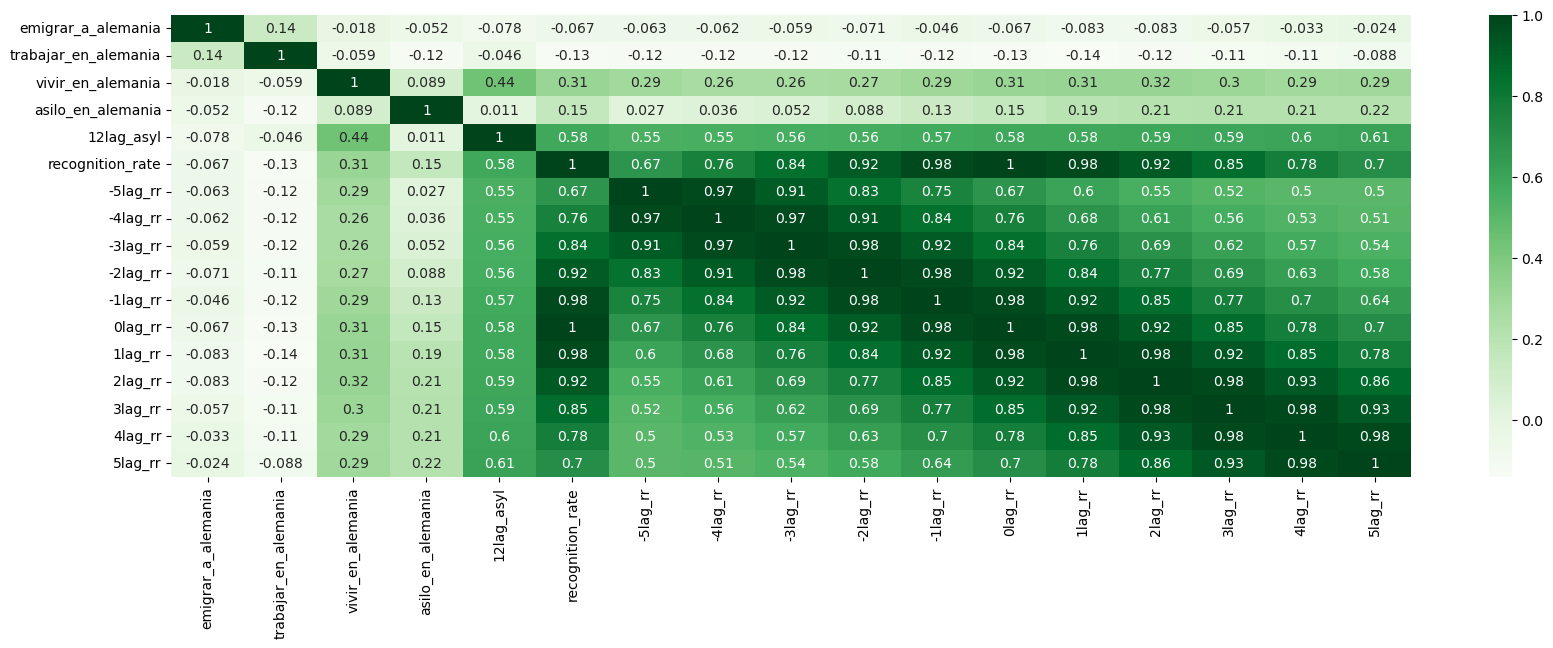

In [57]:
pearsoncorr = clock_aligned.dropna().corr(method="pearson")
plt.figure(figsize=(20, 6))
sns.heatmap(
    pearsoncorr,
    xticklabels=pearsoncorr.columns,
    yticklabels=pearsoncorr.columns,
    cmap="Greens",
    annot=True,
)